In [1]:
#Multi-class Classification evaluation
from sklearn.datasets import load_iris
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict



In [6]:
df = pd.read_csv("HR_comma_sep.csv")

In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
len(df)

14999

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


1.	Perform data quality checks by checking for missing values, if any.

In [10]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [14]:
df['left'].unique()

array([1, 0])

In [15]:
df['salary'].value_counts()



salary
low       7316
medium    6446
high      1237
Name: count, dtype: int64

In [18]:
df['satisfaction_level'].unique()

array([0.38, 0.8 , 0.11, 0.72, 0.37, 0.41, 0.1 , 0.92, 0.89, 0.42, 0.45,
       0.84, 0.36, 0.78, 0.76, 0.09, 0.46, 0.4 , 0.82, 0.87, 0.57, 0.43,
       0.13, 0.44, 0.39, 0.85, 0.81, 0.9 , 0.74, 0.79, 0.17, 0.24, 0.91,
       0.71, 0.86, 0.14, 0.75, 0.7 , 0.31, 0.73, 0.83, 0.32, 0.54, 0.27,
       0.77, 0.88, 0.48, 0.19, 0.6 , 0.12, 0.61, 0.33, 0.56, 0.47, 0.28,
       0.55, 0.53, 0.59, 0.66, 0.25, 0.34, 0.58, 0.51, 0.35, 0.64, 0.5 ,
       0.23, 0.15, 0.49, 0.3 , 0.63, 0.21, 0.62, 0.29, 0.2 , 0.16, 0.65,
       0.68, 0.67, 0.22, 0.26, 0.99, 0.98, 1.  , 0.52, 0.93, 0.97, 0.69,
       0.94, 0.96, 0.18, 0.95])

In [20]:
df['last_evaluation'].unique()







array([0.53, 0.86, 0.88, 0.87, 0.52, 0.5 , 0.77, 0.85, 1.  , 0.54, 0.81,
       0.92, 0.55, 0.56, 0.47, 0.99, 0.51, 0.89, 0.83, 0.95, 0.57, 0.49,
       0.46, 0.62, 0.94, 0.48, 0.8 , 0.74, 0.7 , 0.78, 0.91, 0.93, 0.98,
       0.97, 0.79, 0.59, 0.84, 0.45, 0.96, 0.68, 0.82, 0.9 , 0.71, 0.6 ,
       0.65, 0.58, 0.72, 0.67, 0.75, 0.73, 0.63, 0.61, 0.76, 0.66, 0.69,
       0.37, 0.64, 0.39, 0.41, 0.43, 0.44, 0.36, 0.38, 0.4 , 0.42])

In [21]:
df['number_project'].unique()



array([2, 5, 7, 6, 4, 3])

In [22]:
df['average_montly_hours'].unique()


array([157, 262, 272, 223, 159, 153, 247, 259, 224, 142, 135, 305, 234,
       148, 137, 143, 160, 255, 282, 147, 304, 139, 158, 242, 239, 128,
       132, 294, 134, 145, 140, 246, 126, 306, 152, 269, 127, 281, 276,
       182, 273, 307, 309, 225, 226, 308, 244, 286, 161, 264, 277, 275,
       149, 295, 151, 249, 291, 232, 130, 129, 155, 265, 279, 284, 221,
       154, 150, 267, 257, 177, 144, 289, 258, 263, 251, 133, 216, 300,
       138, 260, 183, 250, 292, 283, 245, 256, 278, 240, 136, 301, 243,
       296, 274, 164, 146, 261, 285, 141, 297, 156, 287, 219, 254, 228,
       131, 252, 236, 270, 298, 192, 248, 266, 238, 229, 233, 268, 231,
       253, 302, 271, 290, 235, 293, 241, 218, 199, 180, 195, 237, 227,
       172, 206, 181, 217, 310, 214, 198, 211, 222, 213, 202, 184, 204,
       288, 220, 299, 303, 212, 196, 179, 205, 230, 203, 280, 169, 188,
       178, 175, 166, 163, 168, 165, 189, 162, 215, 193, 176, 191, 174,
       201, 208, 171, 111, 104, 106, 100, 194, 209, 185, 200, 20

In [23]:

df['time_spend_company'].unique()



array([ 3,  6,  4,  5,  2,  8, 10,  7])

In [24]:
df['Work_accident'].unique()



array([0, 1])

In [25]:
df['promotion_last_5years'].unique()

array([0, 1])

**From the above analysis it is evident that there are no null values or any random values in the dataset**
**There are some duplicate entries/rows in the dataset. However, they could be same different employess with similar details**


In [30]:
df.sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
11499,0.65,0.77,4,205,3,0,0,0,sales,low
8159,0.89,0.91,4,190,2,0,0,0,product_mng,medium
9374,0.99,0.99,3,228,4,0,0,0,IT,low
10208,0.19,0.60,5,198,4,0,0,0,support,high
7546,0.55,0.72,3,204,2,0,0,0,product_mng,low
2395,0.77,0.49,4,266,2,0,0,0,hr,low
13989,0.48,0.80,4,196,5,0,0,0,product_mng,low
11559,0.74,0.78,4,194,8,0,0,0,sales,medium
8791,0.20,0.98,2,228,3,0,0,0,sales,low
8131,0.82,0.56,5,180,3,0,0,0,technical,low


In [31]:
corr_matrix = df[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','left','promotion_last_5years']].corr()

corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


<Axes: >

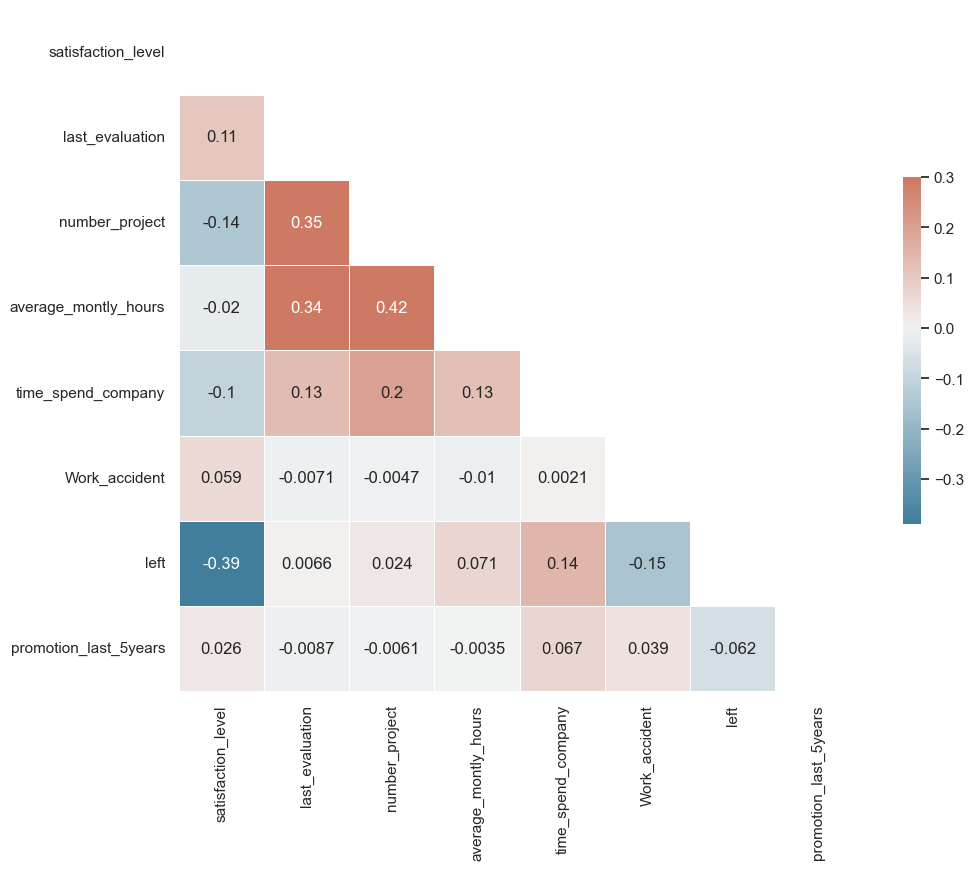

In [34]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

**From the above heatmap, "left" which is the target value is highly correlated with satisfaction_level and moderately correlated with work_accident.**
**last_evaluation is moderately correlated with number_project and average_montly_hours.**
**time_spend_company is moderately correlated with number_project and average_montly_hours.**


<Figure size 1000x1000 with 0 Axes>

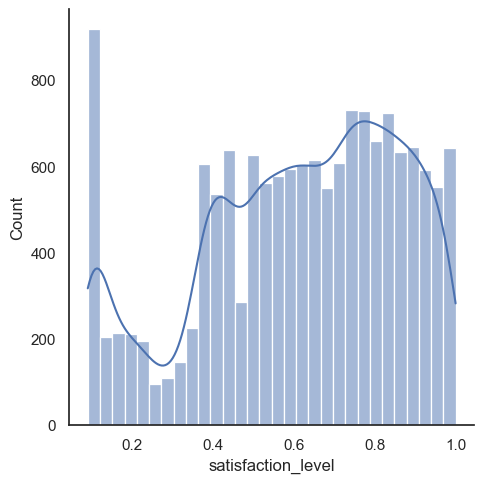

In [40]:
plt.figure(figsize=(10,10))
sns.displot(data=df,x='satisfaction_level',kde=True)


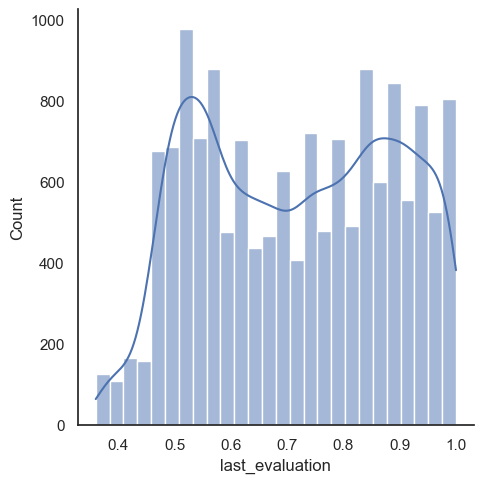

In [41]:
sns.displot(data=df,x='last_evaluation',kde=True)

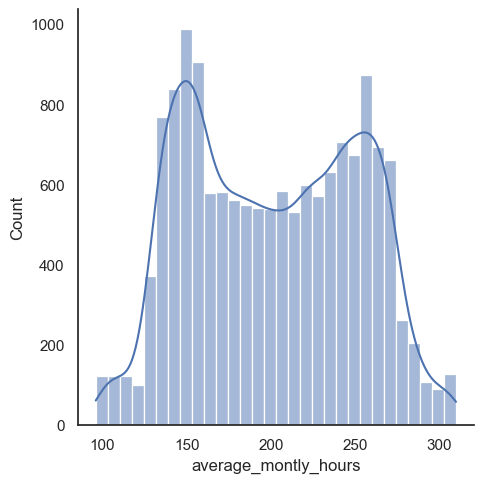

In [44]:
sns.displot(data=df,x='average_montly_hours',kde=True)

(array([11428.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3571.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

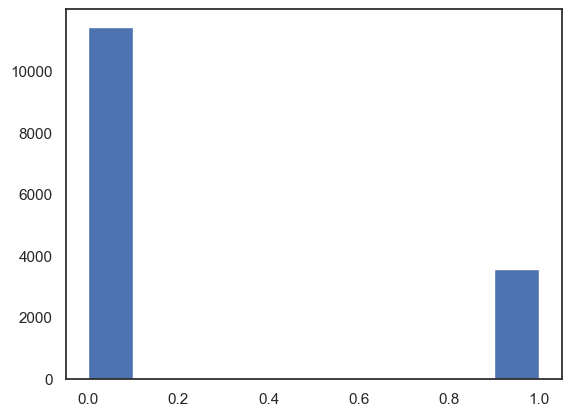

In [47]:
plt.hist(x=df['left'])

In [48]:
df['left'].value_counts()

left
0    11428
1     3571
Name: count, dtype: int64